<a href="https://colab.research.google.com/github/suadamohammed/traditional_denoising/blob/main/static_filter_study__ipynbcient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import the skimage library
import skimage
from skimage import img_as_float
# Import the data module to load an example image
from skimage import data

# Import the restoration module to access the denoising filters
from skimage import restoration

# Import the util module to add noise to the image
from skimage import util


from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten,Conv2D,Conv2DTranspose,UpSampling2D,Concatenate,Input,Add,Lambda,Reshape
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
from tensorflow.keras.models import Sequential, Model
import os
from sklearn.model_selection import train_test_split
from skimage import metrics
from skimage.filters import median
#from tensorflow.keras.utils import plot_model

"""from google.colab import drive
drive.mount('/content/drive')"""


import cv2
import numpy as np

img_spec_x=128
img_spec_y=128

no_images=20
no_epocs=100
no_batch=16

np.random.seed(42)
tf.random.set_seed(42)
from math import log10, sqrt


import time

def add_speckle_noise_test(image, sigma):
    """Adds speckle noise to an image.

    Args:
        image: A NumPy array containing the image.
        sigma: The standard deviation of the speckle noise.

    Returns:
        A NumPy array containing the noisy image.
    """

    # Set a random seed based on the current time
    np.random.seed(int(time.time()))

    # Generate a random Gaussian noise array with the same shape as the image.
    noise = np.random.normal(0, sigma, image.shape)

    # Multiply the noise array by the image to add speckle noise to the image.
    noisy_image = image + image * noise

    return noisy_image




In [ ]:
# MEAN FILTER 30 images

import cv2
import os
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim_metric
import time

# Function to apply mean filter
def mean_filter(image, kernel_size):
    start_time = time.time()
    filtered_img = cv2.blur(image, (kernel_size, kernel_size))
    end_time = time.time()
    elapsed_time = end_time - start_time
    return filtered_img, elapsed_time

# Function to calculate PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate SSIM
def calculate_ssim(img1, img2):
    return ssim_metric(img1, img2)
# Function to apply mean filter
def median_filter(image, kernel_size):
    start_time = time.time()
    filtered_img = cv2.medianBlur(image, kernel_size)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return filtered_img, elapsed_time


def frost_filter(img, kernel_size ,damping_factor=2.0):
    start_time = time.time()
    h, w = img.shape

    padded_img = np.pad(img, kernel_size//2, mode='reflect')
    filtered_img = np.zeros_like(img, dtype=np.float64)

    for i in range(h):
        for j in range(w):
            window = padded_img[i:i+kernel_size, j:j+kernel_size]
            center_pixel = window[kernel_size//2, kernel_size//2]
            distances = (window - center_pixel)**2
            weights = np.exp(-damping_factor * distances)
            filtered_img[i, j] = np.sum(window * weights) / np.sum(weights)

    end_time = time.time()
    elapsed_time = end_time - start_time
    return filtered_img, elapsed_time

def lee_filter(img, kernel_size):
    start_time = time.time()
    img_mean = uniform_filter(img, (kernel_size, kernel_size))
    img_sqr_mean = uniform_filter(img**2, (kernel_size, kernel_size))
    img_variance = img_sqr_mean - img_mean**2
    overall_variance = np.var(img)
    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return img_output, elapsed_time





clean_show = img_as_float(cv2.imread('/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00257.jpg',0))
noisy = img_as_float(cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1//00257.jpg',0))
denoised, time1 = mean_filter(noisy,3)

plt.axis('off')
plt.imshow(denoised, cmap='gray')
plt.savefig('mean.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
!pip install scipy bm3d





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00


In [ ]:


def bm3d_filter(image_noisy):
    start_time = time.time()
    denoised_image = bm3d.bm3d(image_noisy, sigma_psd=0.1, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return denoised_image, elapsed_time



clean_show = img_as_float(cv2.imread('/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00257.jpg',0))
noisy = img_as_float(cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1//00257.jpg',0))
denoised, time1 = bm3d_filter(noisy)

BM3D Filter

Average Values:
   Average PSNR  Average SSIM  Average Time Taken
0     28.188721      0.876754            1.344328


[[0.68383199 0.68383193 0.68383193 ... 0.58659494 0.57634723 0.57827187]
 [0.68383193 0.68370616 0.68368208 ... 0.58268875 0.57371014 0.57547766]
 [0.6838572  0.68371892 0.68397135 ... 0.58254808 0.57357061 0.57509995]
 ...
 [0.67977172 0.68091381 0.68057609 ... 0.53472644 0.5309841  0.53642476]
 [0.67977172 0.68078095 0.68044662 ... 0.53076792 0.52658802 0.53086042]
 [0.67977178 0.67977172 0.67954355 ... 0.53086519 0.53000695 0.53398103]]


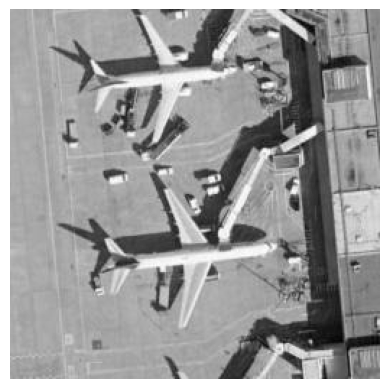

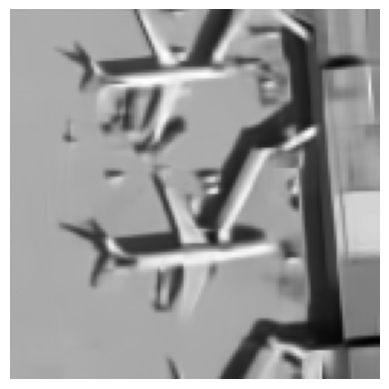

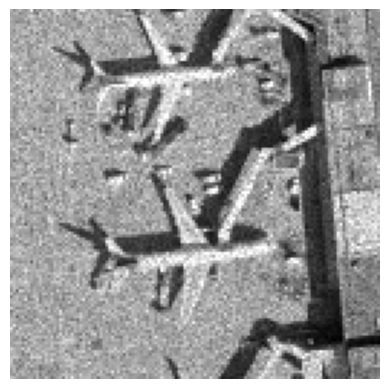

In [ ]:


plt.axis('off')
plt.imshow(clean_show, cmap='gray')
plt.savefig('clean.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


# Display and save the denoised image

plt.axis('off')
plt.imshow(denoised, cmap='gray')
plt.savefig('bm3d.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Display and save the noisy image

plt.axis('off')
plt.imshow(noisy, cmap='gray')
plt.savefig('noisy.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


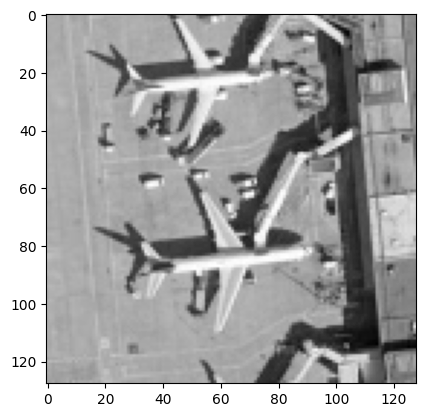

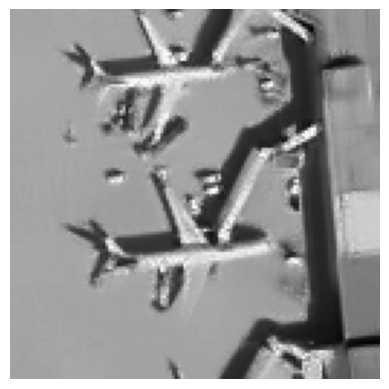

4.1628114153354066
0.0035059577071973385


In [ ]:

def nlm_filter(img, h=15, templateWindowSize=7, searchWindowSize=21):
    start_time = time.time()
    # Apply NLM denoising
    dst = cv2.fastNlMeansDenoising(img, None, h, templateWindowSize, searchWindowSize)
    end_time = time.time()
    elapsed = end_time - start_time

    return dst, elapsed


clean_show = img_as_float(cv2.imread('/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00257.jpg',0))
clean_show=cv2.resize(clean_show,(128,128))
noisy = cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1//00257.jpg',0)
denoised, time1 = nlm_filter(noisy, h=20 ,templateWindowSize=7,searchWindowSize=25)


# Display and save the denoised image

plt.imshow(clean_show,cmap='gray')
plt.show()

plt.axis('off')
plt.imshow(denoised, cmap='gray')
plt.savefig('nlm.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(calculate_psnr(denoised, clean_show))
print(calculate_ssim(denoised, clean_show))

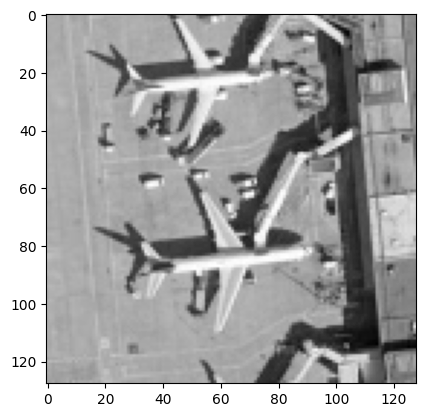

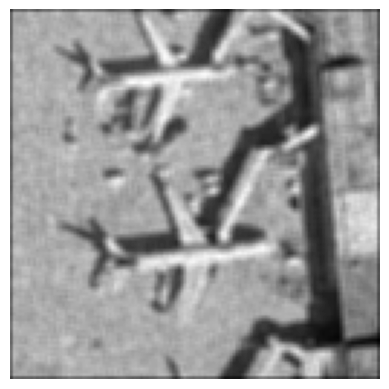

-43.84246972639651


In [ ]:
# adaptive weiner

from scipy.signal import convolve2d
from scipy.fftpack import fft2, ifft2
import numpy as np


from scipy.signal import wiener

# Apply the filter

def adaptive_weiner(noisy_img,kernel_size,):
  st=time.time()
  filtered_img = wiener(noisy_img, mysize=(kernel_size,kernel_size), noise=0.1)
  ed=time.time()
  elapsed=ed-st
  return filtered_img,elapsed


clean_show = img_as_float(cv2.imread('/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00257.jpg',0))
clean_show=cv2.resize(clean_show,(128,128))
noisy = cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1//00257.jpg',0)
denoised, time1 = adaptive_weiner(noisy,3)


# Display and save the denoised image

plt.imshow(clean_show,cmap='gray')
plt.show()

plt.axis('off')
plt.imshow(denoised, cmap='gray')
plt.savefig('ad-weiner.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(calculate_psnr(denoised, clean_show))

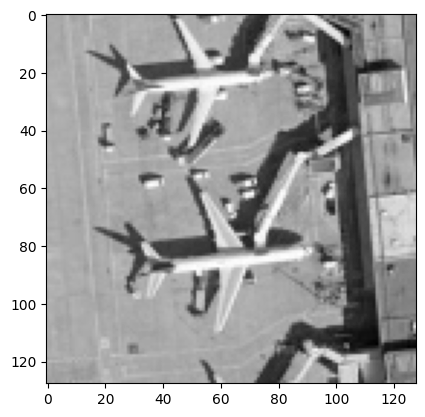

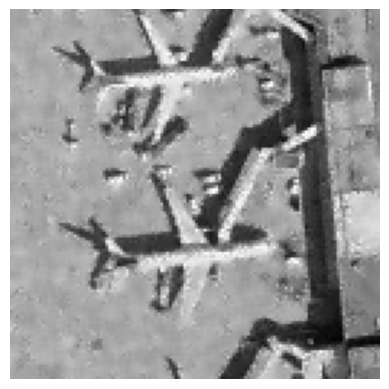

-20.219210392118768


In [ ]:

import numpy as np
from scipy.stats import variation

def weighting(window, cu):
    two_cu = cu * cu
    ci = variation(window, None)
    two_ci = ci * ci
    divisor = 1.0 + two_cu
    if not divisor:
        divisor = 0.0001
    if cu > ci:
        w_t = 0.0
    else:
        w_t = (1.0 - (two_cu / two_ci)) / divisor
    return w_t

def kuan_filter(img, win_size=3, cu=0.1):
    st=time.time()
    img = np.float64(img)
    img_filtered = np.zeros_like(img)
    N, M = img.shape
    win_offset = win_size // 2
    for i in range(0, N):
        xleft = max(i - win_offset, 0)
        xright = min(i + win_offset, N)
        for j in range(0, M):
            yup = max(j - win_offset, 0)
            ydown = min(j + win_offset, M)
            pix_value = img[i, j]
            window = img[xleft:xright, yup:ydown]
            w_t = weighting(window, cu)
            window_mean = window.mean()
            new_pix_value = (pix_value * w_t) + (window_mean * (1.0 - w_t))
            img_filtered[i, j] = round(new_pix_value)
    end=time.time()
    elapsed=end-st
    return img_filtered,elapsed

clean_show = cv2.imread('/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00257.jpg',0)
clean_show=cv2.resize(clean_show,(128,128))
noisy = cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1//00257.jpg',0)
denoised, time1 = kuan_filter(noisy,5)


# Display and save the denoised image

plt.imshow(clean_show,cmap='gray')
plt.show()

plt.axis('off')
plt.imshow(denoised, cmap='gray')
plt.savefig('kuan2.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(calculate_psnr(denoised, clean_show))

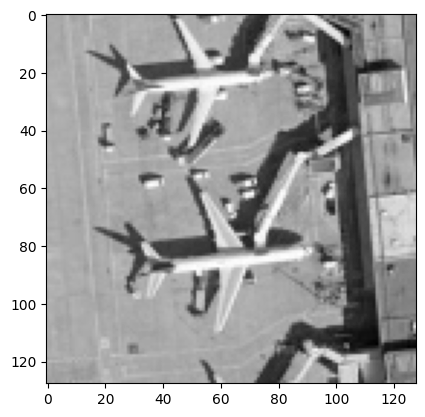

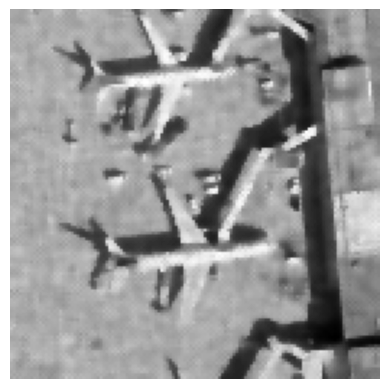

-17.205317595896407


In [ ]:


def bilateral_filter(img,d_win):
  # Apply bilateral filter with d = 15,
  tt=time.time()
  bilateral = cv2.bilateralFilter(img, d_win, 50, 50)
  et=time.time()
  elapse=et-tt
  return bilateral,elapse

clean_show = cv2.imread('/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00257.jpg',0)
clean_show=cv2.resize(clean_show,(128,128))
noisy = cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1//00257.jpg',0)
denoised, time1 = bilateral_filter(noisy,5)


# Display and save the denoised image

plt.imshow(clean_show,cmap='gray')
plt.show()

plt.axis('off')
plt.imshow(denoised, cmap='gray')
plt.savefig('bilateral.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(calculate_psnr(denoised, clean_show))

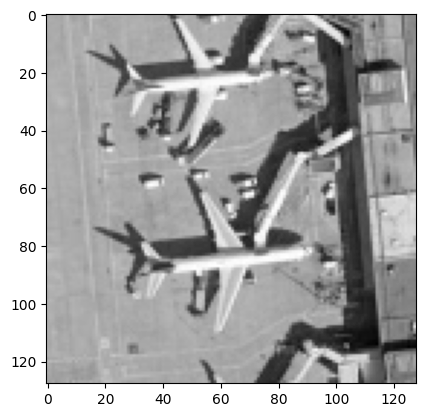

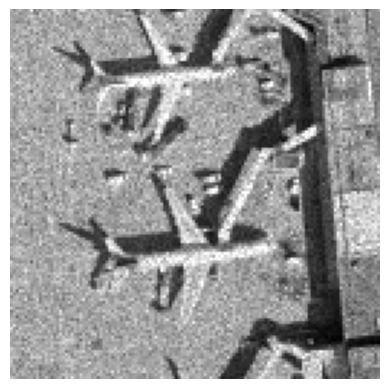

-41.583680052119036


In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter

def diffusivity(I, lambda_):
    return np.exp(-(I / lambda_)**2)

def srad(I, num_iter=600, time_step=0.2, lambda_=0.2):
    st=time.time()
    I = I.astype(np.float64)
    rows, cols = I.shape
    q0sqr = np.var(I)
    for i in range(num_iter):
        nabla_I = np.sqrt(gaussian_filter(I, sigma=time_step, order=[1,0])**2 + gaussian_filter(I, sigma=time_step, order=[0,1])**2)
        nabla_I = nabla_I / (nabla_I**2 + q0sqr)
        diff_I = diffusivity(nabla_I, lambda_)
        nabla_diff_I = np.sqrt(gaussian_filter(diff_I, sigma=time_step, order=[1,0])**2 + gaussian_filter(diff_I, sigma=time_step, order=[0,1])**2)
        nabla_diff_I = nabla_diff_I / (nabla_diff_I**2 + q0sqr)
        diff_I = diffusivity(nabla_diff_I, lambda_)
        I = I + time_step * diff_I
        et=time.time()
        elapsed=et-et
    return I,elapsed





# Function to calculate PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate SSIM
def calculate_ssim(img1, img2):
    return ssim_metric(img1, img2)


clean_show = img_as_float(cv2.imread('/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00257.jpg',0))
clean_show=cv2.resize(clean_show,(128,128))
noisy = img_as_float(cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1//00257.jpg',0))
denoised, time1 = srad(noisy)


# Display and save the denoised image

plt.imshow(clean_show,cmap='gray')
plt.show()

plt.axis('off')
plt.imshow(denoised, cmap='gray')
plt.savefig('bilateral.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(calculate_psnr(denoised, clean_show))


/usr/local/lib/python3.10/dist-packages/phasepack/tools.py:11: UserWarning: 
Module 'pyfftw' (FFTW Python bindings) could not be imported. To install it, try
running 'pip install pyfftw' from the terminal. Falling back on the slower
'fftpack' module for 2D Fourier transforms.
  warnings.warn("""


[[[ 90  90  90]
  [ 90  90  90]
  [ 83  83  83]
  ...
  [180 180 180]
  [189 189 189]
  [148 148 148]]

 [[ 89  89  89]
  [ 76  76  76]
  [ 80  80  80]
  ...
  [163 163 163]
  [217 217 217]
  [192 192 192]]

 [[ 92  92  92]
  [ 76  76  76]
  [ 65  65  65]
  ...
  [171 171 171]
  [159 159 159]
  [181 181 181]]

 ...

 [[ 58  58  58]
  [ 81  81  81]
  [ 29  29  29]
  ...
  [219 219 219]
  [179 179 179]
  [171 171 171]]

 [[ 50  50  50]
  [ 62  62  62]
  [ 34  34  34]
  ...
  [182 182 182]
  [169 169 169]
  [215 215 215]]

 [[ 93  93  93]
  [ 80  80  80]
  [ 80  80  80]
  ...
  [214 214 214]
  [170 170 170]
  [184 184 184]]]


0it [00:05, ?it/s]


AttributeError: 'NoneType' object has no attribute 'shape'

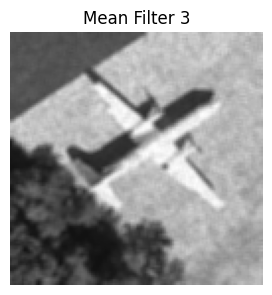

In [ ]:

import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from image_similarity_measures.evaluate import evaluation

# Function to apply mean filter
def mean_filter(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

# Load the image
img = cv2.imread('/content/drive/MyDrive/dataset-filter-analysis/0.1-analysis/0.1/00073.jpg')
img=cv2.resize(img,(128,128))

print(img)

# Define a list of filter sizes
filter_sizes = [3, 5, 7, 9, 11, 13, 15]

# Create a subplot for each filter size
plt.figure(figsize=(15, 10))

evaluation_results = []

for i, filter_size in tqdm(enumerate(filter_sizes)):
    # Apply mean filter
    filtered_img,elapsed_time = median_filter(img, filter_size)

    # Add the subplot for image display
    plt.subplot(2, 4, i + 1)

    # Display the image
    plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))

    # Add title with filter size
    plt.title(f'Mean Filter {filter_size}')

    # Remove axis labels
    plt.axis('off')

    # Perform evaluation for each metric
    rmse_value = rmse(org_img=org_img, pred_img=filtered_img)
    psnr_value = psnr(org_img=org_img, pred_img=filtered_img)
    ssim_value = ssim(org_img=org_img, pred_img=filtered_img)
    fsim_value = fsim(org_img=org_img, pred_img=filtered_img)
    issm_value = issm(org_img=org_img, pred_img=filtered_img)
    sre_value = sre(org_img=org_img, pred_img=filtered_img)
    sam_value = sam(org_img=org_img, pred_img=filtered_img)
    uiq_value = uiq(org_img=org_img, pred_img=filtered_img)

    # Create a dictionary for the current evaluation
    evaluation_result = {
        "time_taken":elapsed_time,
        "frame_size" : filter_size,
        "rmse": rmse_value,
        "psnr": psnr_value,
        "ssim": ssim_value,
        "fsim": fsim_value,
        "issm": issm_value,
        "sre": sre_value,
        "sam": sam_value,
        "uiq": uiq_value
    }

    # Append the evaluation result to the list
    evaluation_results.append(evaluation_result)

# Convert the evaluation results to a Pandas DataFrame
df = pd.DataFrame(evaluation_results)

# Display the table of evaluation results
print(df)

# Show the plot
plt.show()




